In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_all_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        44.5774 (42.9953, 45.1834) (43.3849, 45.2000)  1.8151 (Jnode 202)\n',
 't_n104        30.1474 (27.0888, 32.6148) (27.2289, 32.7227)  5.4938 (Jnode 201)\n',
 't_n105        28.9828 (26.0035, 31.4425) (26.1447, 31.5543)  5.4096 (Jnode 200)\n',
 't_n106        26.3252 (23.5670, 28.7722) (23.6627, 28.8535)  5.1908 (Jnode 199)\n',
 't_n107        25.4966 (22.8215, 27.9154) (22.9173, 27.9985)  5.0812 (Jnode 198)\n',
 't_n108        23.9651 (21.4384, 26.3352) (21.4586, 26.3516)  4.8930 (Jnode 197)\n',
 't_n109        12.4318 (11.2378, 14.1988) (11.1228, 14.0403)  2.9174 (Jnode 196)\n',
 't_n110        12.3068 (11.1273, 14.0578) (11.0075, 13.8951)  2.8876 (Jnode 195)\n',
 't_n111        11.8828 (10.7577, 13.5701) (10.6383, 13.4083)  2.7700 (Jnode 194)\n',
 't_n112        11.3356 (10.2739, 12.9467) (10.1709, 12.7985)  2.6276 (Jnode 193)\n',
 't_n113        10.8161 ( 9.8226, 12.3501) ( 9.7257, 12.2132)  2.4875 (Jnode 192)\n',
 't_n114         7.2533 ( 6.4489,  8.3565) ( 6.3661,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[44.5774,
 30.1474,
 28.9828,
 26.3252,
 25.4966,
 23.9651,
 12.4318,
 12.3068,
 11.8828,
 11.3356,
 10.8161,
 7.2533,
 4.3424,
 2.5401,
 2.1778,
 8.3055,
 6.9663,
 11.3771,
 7.0801,
 10.8798,
 8.6421,
 7.0131,
 6.1109,
 10.6053,
 9.9047,
 2.9592,
 11.7241,
 10.5129,
 8.1768,
 6.5316,
 7.2827,
 6.535,
 5.3911,
 5.5876,
 22.2703,
 18.2668,
 24.2919,
 22.2738,
 20.61,
 17.2337,
 9.6516,
 16.8673,
 14.6149,
 12.9477,
 10.8825,
 20.3042,
 18.6752,
 5.4834,
 2.5851,
 27.0195,
 25.3539,
 22.7195,
 22.2186,
 23.8783,
 16.3132,
 20.0983,
 15.8394,
 29.3178,
 27.5809,
 25.1284,
 23.4918,
 20.2233,
 13.852,
 17.7857,
 24.4462,
 8.9849,
 24.5997,
 36.685,
 35.4836,
 34.341,
 32.655,
 30.0987,
 28.6319,
 27.3198,
 25.8407,
 22.9043,
 19.7498,
 16.413,
 23.1084,
 21.6863,
 17.3518,
 19.1267,
 25.5798,
 23.4253,
 21.3074,
 18.3263,
 12.6658,
 23.8085,
 21.3527,
 18.5481,
 28.3198,
 26.691,
 24.6522,
 21.5771,
 15.313,
 24.8009,
 17.5974,
 13.8844,
 5.6043,
 35.7837,
 31.1062]

In [7]:
lower_ci_iqtree

[5.1834,
 2.6148,
 1.4425,
 8.7722,
 7.9154,
 6.3352,
 4.1988,
 4.0578,
 3.5701,
 2.9467,
 0.8226,
 0.4489,
 0.2077,
 0.3843,
 0.5299,
 0.2493,
 0.9161,
 2.9956,
 0.8303,
 0.8363,
 0.5689,
 0.9218,
 0.7449,
 0.4519,
 0.7701,
 0.9741,
 3.3993,
 0.3884,
 0.9542,
 0.3251,
 0.2195,
 0.5194,
 0.4671,
 0.201,
 4.665,
 1.0659,
 6.688,
 4.6885,
 3.0604,
 9.8594,
 0.6193,
 9.5291,
 7.3108,
 5.5839,
 0.3862,
 2.8754,
 1.3801,
 0.893,
 0.2798,
 9.5508,
 8.0057,
 5.6993,
 5.2773,
 6.686,
 0.1694,
 3.271,
 9.4162,
 1.8289,
 0.1709,
 7.917,
 6.4161,
 3.403,
 7.8515,
 1.13,
 7.4203,
 0.2325,
 7.7501,
 8.5364,
 7.0272,
 5.6564,
 3.7124,
 1.3758,
 0.0703,
 8.886,
 7.5601,
 4.9973,
 2.2219,
 9.2818,
 5.1339,
 3.8246,
 0.0646,
 1.5665,
 7.3207,
 5.3855,
 3.4701,
 0.7258,
 5.5194,
 5.7455,
 3.5763,
 1.1351,
 9.8407,
 8.4803,
 6.8219,
 4.3207,
 9.0631,
 7.0511,
 1.2295,
 7.5665,
 0.4385,
 7.6059,
 3.3068]

In [8]:
upper_ci_iqtree

[43.3849,
 27.2289,
 26.1447,
 23.6627,
 22.9173,
 21.4586,
 11.1228,
 11.0075,
 10.6383,
 10.1709,
 12.3501,
 8.3565,
 4.7119,
 2.7741,
 2.9359,
 9.6282,
 8.1713,
 10.1997,
 8.632,
 12.424,
 10.0078,
 8.2555,
 7.6584,
 12.2087,
 11.4632,
 4.3269,
 10.4792,
 12.0341,
 9.5541,
 7.8334,
 8.2964,
 7.5275,
 6.3643,
 7.3902,
 19.8267,
 15.3969,
 21.7621,
 19.7499,
 18.0174,
 14.389,
 12.6711,
 14.0434,
 11.8077,
 10.2936,
 13.3823,
 17.6373,
 15.9062,
 8.1117,
 4.2598,
 24.2168,
 22.5765,
 19.647,
 19.074,
 20.8207,
 11.7466,
 16.6572,
 11.8987,
 26.4119,
 24.6665,
 22.0825,
 20.4354,
 17.0414,
 10.3903,
 14.4543,
 21.2785,
 13.1641,
 21.1917,
 35.2159,
 34.2938,
 33.3945,
 32.26,
 28.7612,
 26.9816,
 25.5439,
 23.9243,
 20.5566,
 16.948,
 13.1889,
 20.8996,
 19.2896,
 14.4108,
 16.4873,
 23.6604,
 21.2613,
 19.0778,
 15.9091,
 10.1464,
 21.657,
 18.9314,
 15.8411,
 26.5834,
 24.6188,
 22.1687,
 18.5007,
 11.2632,
 22.1778,
 14.4571,
 10.7771,
 8.1592,
 34.2585,
 28.2289]

In [9]:
file_LG = open("LG_all_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

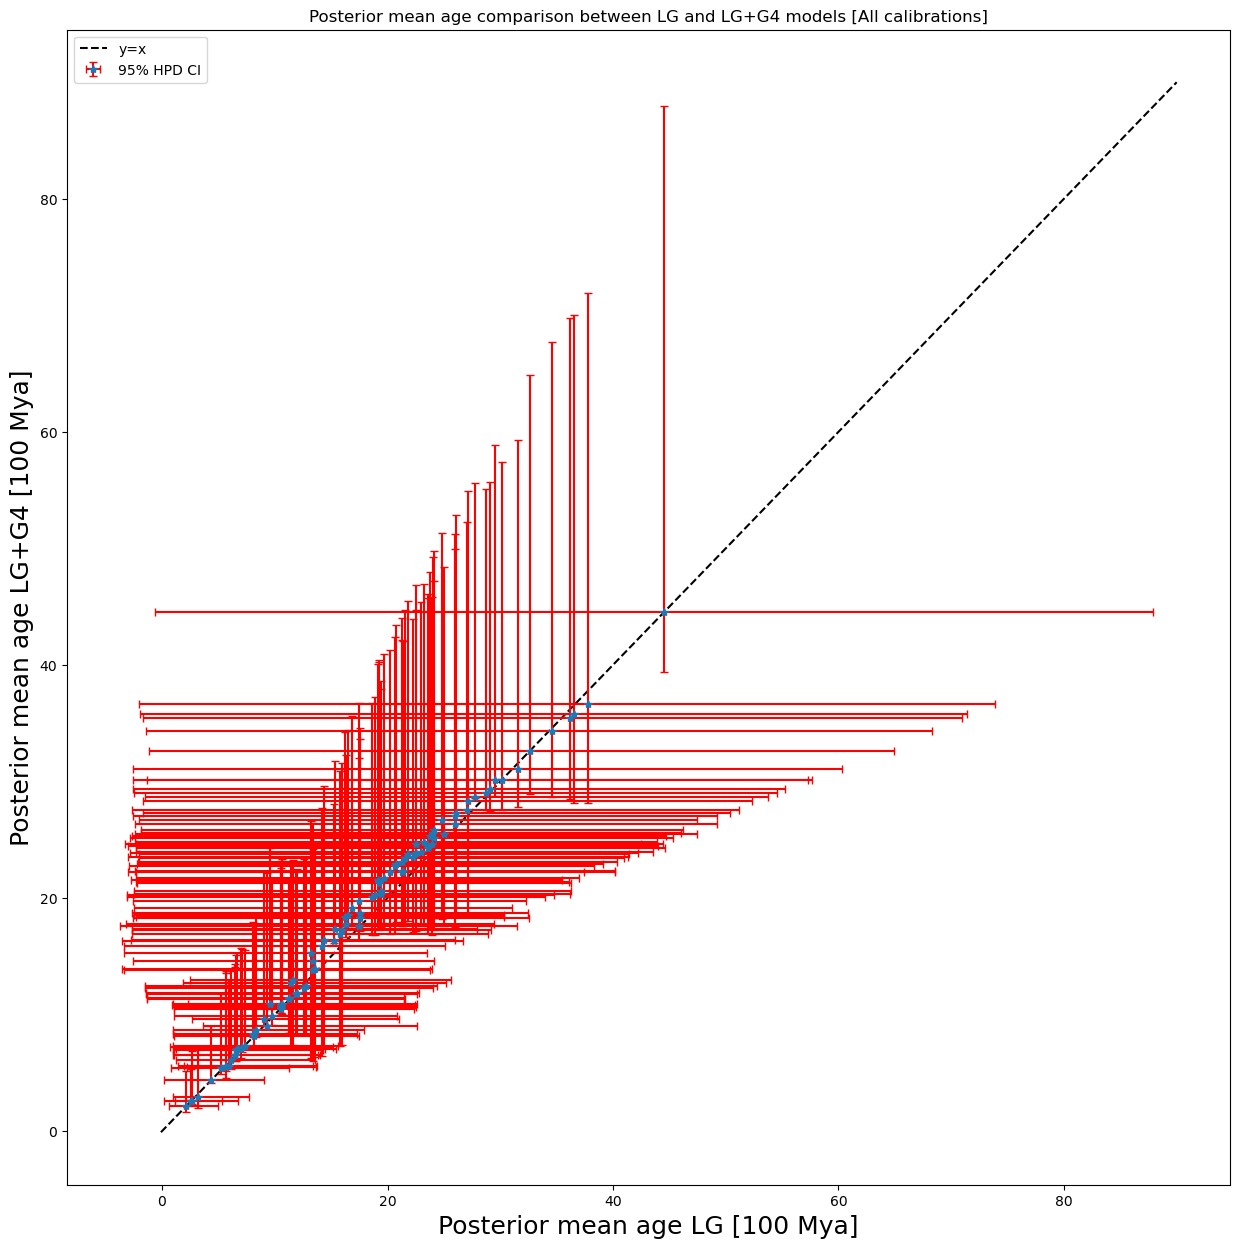

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,90], 
        [-0.1, 90], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 models [All calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_all.png')

In [11]:
posterior_mean_baseml

[44.5673,
 30.1583,
 28.6943,
 25.9474,
 25.0059,
 22.9499,
 12.8087,
 12.6316,
 11.9728,
 11.2926,
 10.5907,
 7.1124,
 4.3467,
 2.543,
 2.1501,
 8.0516,
 6.597,
 11.2819,
 7.0013,
 10.666,
 8.3757,
 6.656,
 6.1265,
 10.5905,
 9.7827,
 3.2102,
 11.8992,
 10.5482,
 8.1683,
 6.4756,
 7.3175,
 6.43,
 5.1949,
 5.9175,
 21.2449,
 17.5645,
 23.5711,
 21.3474,
 19.4127,
 15.9578,
 9.04,
 15.7839,
 13.4177,
 11.5856,
 9.5569,
 19.4181,
 17.598,
 5.6858,
 2.6609,
 25.9933,
 23.7294,
 20.6434,
 20.2389,
 22.5349,
 15.2175,
 18.5787,
 14.1599,
 29.1063,
 27.066,
 24.1588,
 22.2232,
 18.9235,
 13.4049,
 16.3075,
 23.6073,
 9.3301,
 23.979,
 37.8006,
 36.1629,
 34.6319,
 32.6762,
 29.5457,
 27.7272,
 26.1164,
 24.129,
 20.7887,
 17.4738,
 14.3767,
 21.3203,
 19.6819,
 15.3836,
 16.8068,
 24.0377,
 21.5597,
 19.2484,
 16.2564,
 11.4024,
 21.8161,
 19.2747,
 16.4718,
 27.1253,
 24.8381,
 22.4999,
 19.154,
 13.2555,
 23.2521,
 17.4999,
 13.5845,
 5.6624,
 36.5469,
 31.5972]

In [12]:
posterior_mean_iqtree

[44.5774,
 30.1474,
 28.9828,
 26.3252,
 25.4966,
 23.9651,
 12.4318,
 12.3068,
 11.8828,
 11.3356,
 10.8161,
 7.2533,
 4.3424,
 2.5401,
 2.1778,
 8.3055,
 6.9663,
 11.3771,
 7.0801,
 10.8798,
 8.6421,
 7.0131,
 6.1109,
 10.6053,
 9.9047,
 2.9592,
 11.7241,
 10.5129,
 8.1768,
 6.5316,
 7.2827,
 6.535,
 5.3911,
 5.5876,
 22.2703,
 18.2668,
 24.2919,
 22.2738,
 20.61,
 17.2337,
 9.6516,
 16.8673,
 14.6149,
 12.9477,
 10.8825,
 20.3042,
 18.6752,
 5.4834,
 2.5851,
 27.0195,
 25.3539,
 22.7195,
 22.2186,
 23.8783,
 16.3132,
 20.0983,
 15.8394,
 29.3178,
 27.5809,
 25.1284,
 23.4918,
 20.2233,
 13.852,
 17.7857,
 24.4462,
 8.9849,
 24.5997,
 36.685,
 35.4836,
 34.341,
 32.655,
 30.0987,
 28.6319,
 27.3198,
 25.8407,
 22.9043,
 19.7498,
 16.413,
 23.1084,
 21.6863,
 17.3518,
 19.1267,
 25.5798,
 23.4253,
 21.3074,
 18.3263,
 12.6658,
 23.8085,
 21.3527,
 18.5481,
 28.3198,
 26.691,
 24.6522,
 21.5771,
 15.313,
 24.8009,
 17.5974,
 13.8844,
 5.6043,
 35.7837,
 31.1062]

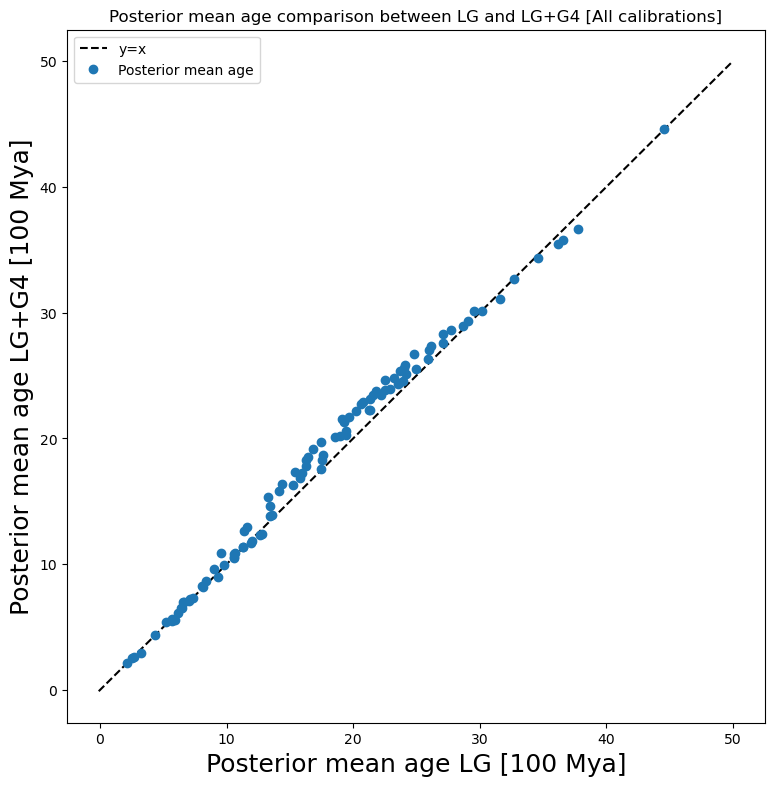

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_all_scatter.png')

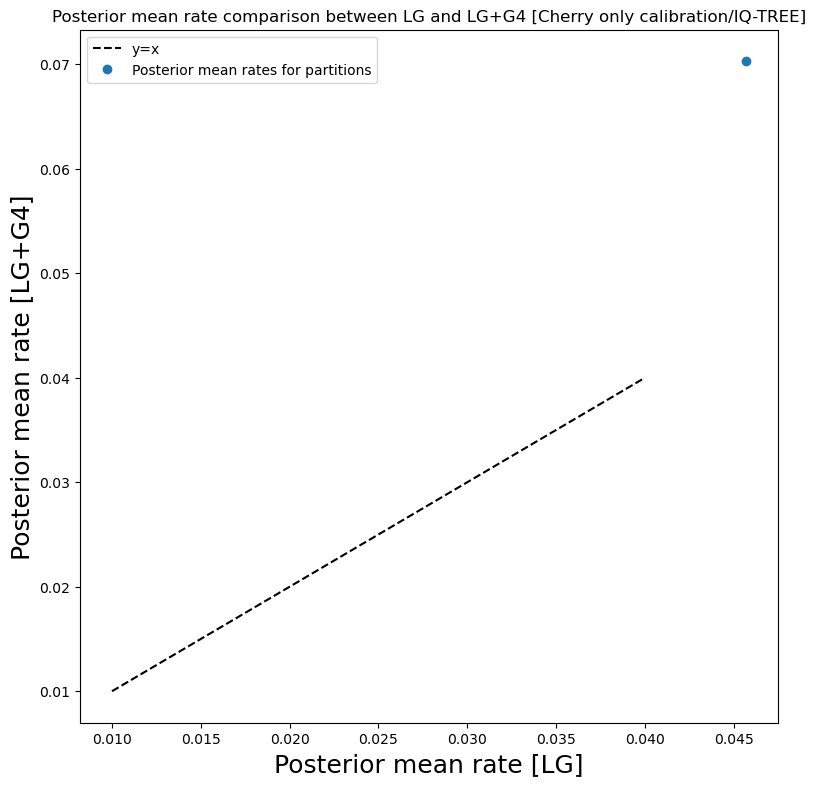

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.04], 
        [0.01, 0.04], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')